<a href="https://colab.research.google.com/github/1nt18cs400/Global-Terrorism/blob/main/First_Project_on_GTD_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

**Import libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from IPython.display import clear_output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


**Read Data from Google colab**

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Read CSV File

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Copy of Global Terrorism Data.csv', encoding='ISO-8859-1', low_memory=False)

Display Head of the Data

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.count

<bound method DataFrame.count of              eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0       197000000001   1970       7     2  ...        0         0       0      NaN
1       197000000002   1970       0     0  ...        1         1       1      NaN
2       197001000001   1970       1     0  ...       -9         1       1      NaN
3       197001000002   1970       1     0  ...       -9         1       1      NaN
4       197001000003   1970       1     0  ...       -9         1       1      NaN
...              ...    ...     ...   ...  ...      ...       ...     ...      ...
181686  201712310022   2017      12    31  ...        0         0       0      NaN
181687  201712310029   2017      12    31  ...       -9         1       1      NaN
181688  201712310030   2017      12    31  ...        0         0       0      NaN
181689  201712310031   2017      12    31  ...       -9         0      -9      NaN
181690  201712310032   2017      12    31  ...       -

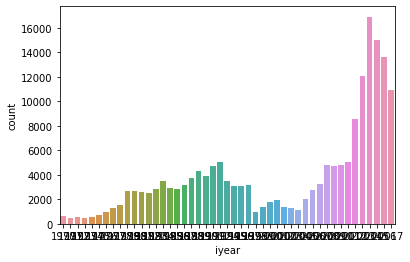

In [ ]:
sns.countplot('iyear',data = df)

In Which Year Does the highest number of attacks occured ? We can plot bar plot using seaborn.

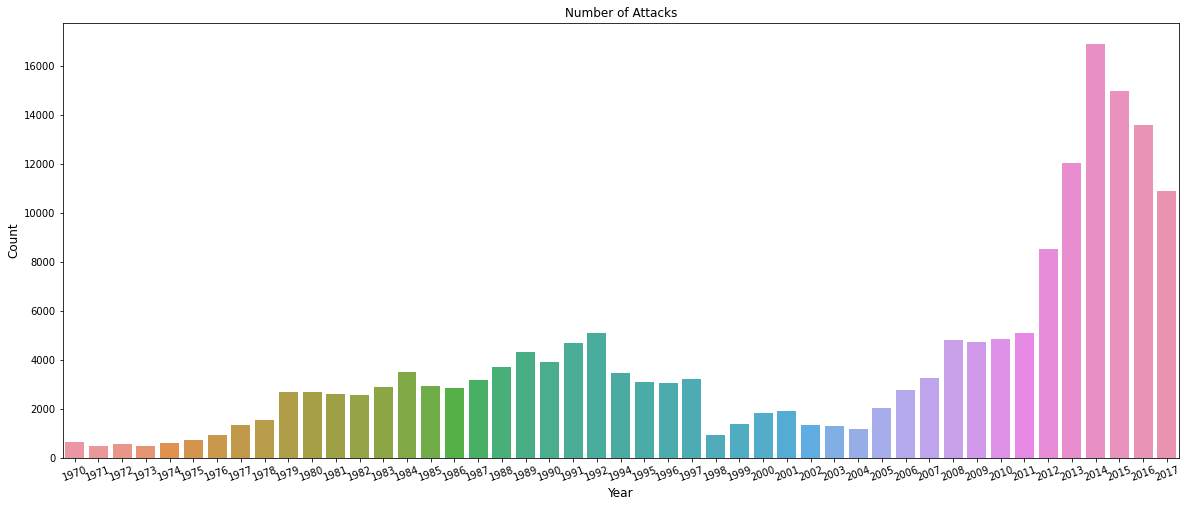

In [ ]:
f = plt.figure(figsize=(20,8))
year_count = sns.countplot(x='iyear', data  = df)
year_count.set_xticklabels(year_count.get_xticklabels(),rotation=20)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Attacks',fontsize =12)
plt.show()

Which region suffered the highest number of attacks ? We can plot similar bar plot using seaborn. 

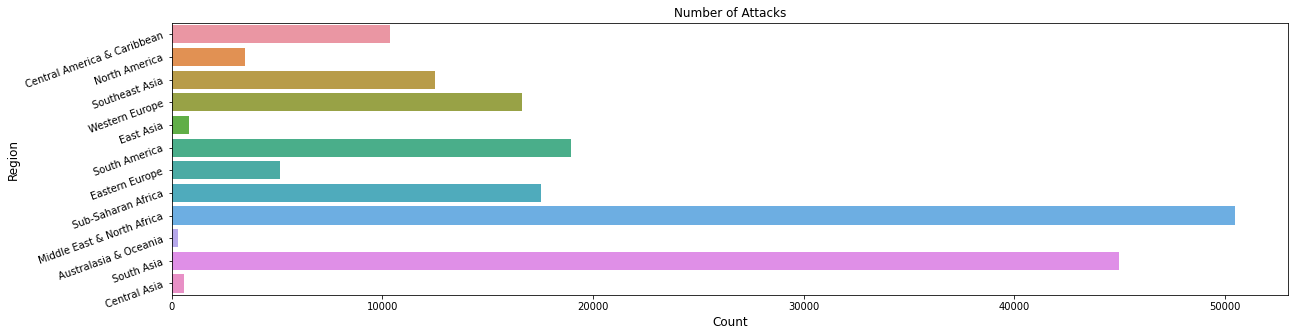

In [ ]:
f = plt.figure(figsize=(20,5))
#sns.set(font_scale=0.9)
year_count = sns.countplot(y='region_txt', data  = df)
year_count.set_yticklabels(year_count.get_yticklabels(),rotation=20)
plt.ylabel('Region', fontsize = 12)
plt.xlabel('Count', fontsize=12)
plt.title('Number of Attacks',fontsize =12)
plt.show()

Often In news of social media we have read — Middle-East & North Africa and South Asia are the two top regions in terms of number of terrorist attacks. We can also check what type of attacking method was most used by terrorists. Here we have used Pie plot to display the Various attack types which are mostly used by the terrorists.

Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Others                             9941
Name: attacktype1_txt, dtype: int64

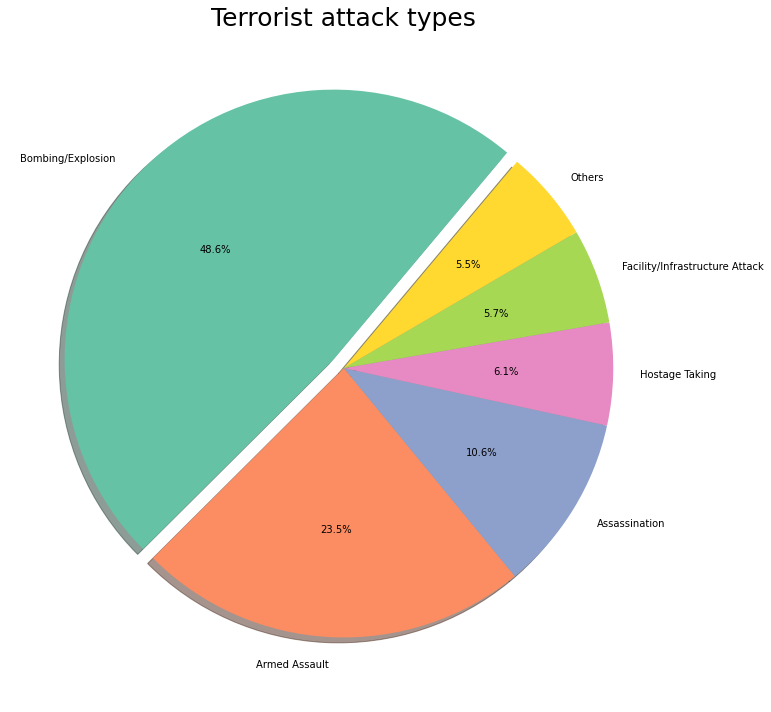

In [ ]:
filtered =df['attacktype1_txt'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                            'Hostage Taking (Kidnapping)','Facility/Infrastructure Attack'] else 'Others')

attack_type = filtered.value_counts()
labels = ['Bombing/Explosion','Armed Assault','Assassination',
          'Hostage Taking','Facility/Infrastructure Attack','Others']
plt.figure(figsize=(20,10))
sizes = [attack_type]
colors = sns.color_palette("Set2")
explode = (0.05,0, 0, 0, 0, 0)  
plt.pie(sizes, labels=labels, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=50)
plt.title('Terrorist attack types', fontsize= 25)
plt.tight_layout()

attack_type

After the above plotting we can say that, Bombing/Explosions are mostly favored by terrorists for destructive activities. 

In the below we are showing were targeted most of the times by terrorists using the Pie Plot

Others                         103675
Private Citizens & Property     43511
Military                        27984
Government (Diplomatic)          3573
Journalists & Media              2948
Name: targtype1_txt, dtype: int64

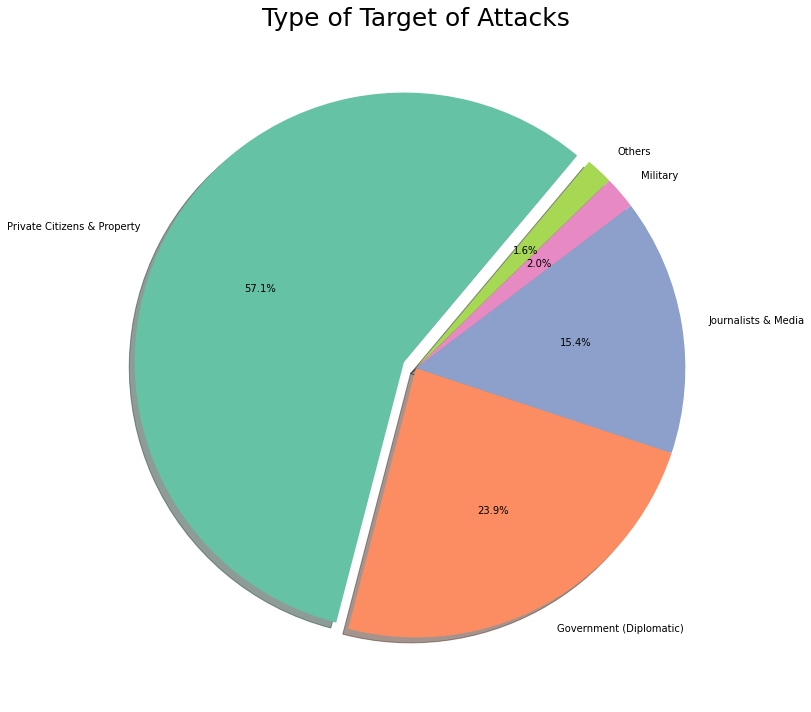

In [82]:
filtered =df['targtype1_txt'].apply(lambda x: x if x in ['Private Citizens & Property','Government (Diplomatic)','Journalists & Media',
                                                            'Military'] else 'Others')

target = filtered.value_counts()

labels = ['Private Citizens & Property','Government (Diplomatic)','Journalists & Media','Military','Others']
weap_sizes = []
plt.figure(figsize=(20,10))
for j in target:
    percent = j*100/len(df['targtype1_txt'])
    weap_sizes.append(percent)
colors = sns.color_palette("Set2")
explode = (0.05,0, 0, 0, 0)  
plt.pie(weap_sizes, labels=labels, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=50)
plt.title('Type of Target of Attacks', fontsize= 25)
plt.tight_layout()

target

We can also see above that Private citizens and property were targeted most of the times by terrorists

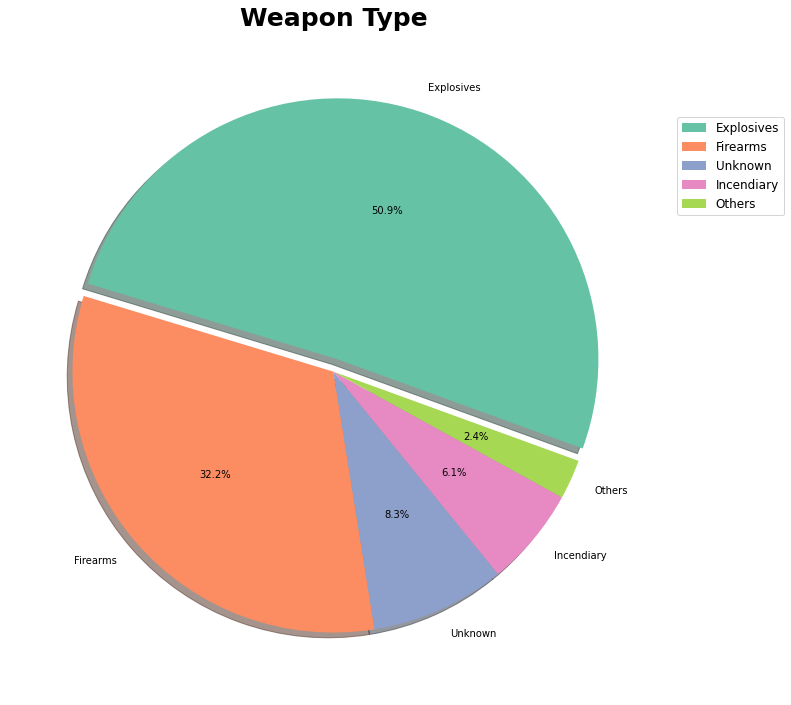

In [83]:
weaptype_filtered =df['weaptype1_txt'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown',
                                                               'Incendiary'] else 'Others')
values = weaptype_filtered.value_counts().tolist()

# Pie chart of weapons types
weap_labels = ['Explosives','Firearms','Unknown','Incendiary','Others']

weap_sizes = []

for j in weaptype:
    percent = j*100/len(df['weaptype1_txt'])
    weap_sizes.append(percent)

fig, ax = plt.subplots(figsize=(12,12))



plt.pie(values, startangle= -20, labels = weap_labels, autopct='%1.1f%%',  shadow = True,explode = (0.05, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8))
plt.title('Weapon Type',fontsize= 25, pad= 20, weight ='bold')
plt.legend(labels = weap_labels, loc='upper right', bbox_to_anchor = (1.2, 0.9), fontsize=12 ) # location legend
plt.show()


We have discussed above and plotted in pie chart that which type of weapons are used by terrorist. Now we are plotting number of attacks in a year with region wise 

<Figure size 792x720 with 0 Axes>

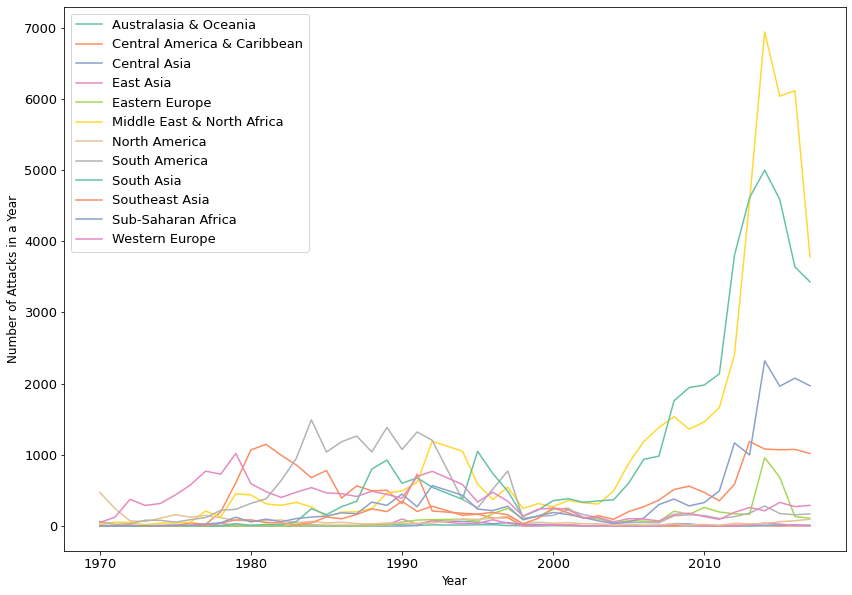

In [ ]:

df['weaptype1_txt'].value_counts()
region_year = pd.crosstab(df.iyear, df.region_txt)
fig = plt.figure(figsize=(11, 10))

colors = sns.color_palette("Set2")
region_year.plot(figsize=(14, 10), fontsize=13, color=colors)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks in a Year', fontsize=12)
plt.legend(fontsize=13)

In [ ]:
df


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,20

In [ ]:
df['Damage']=df['nkill']+df['nwound']

In [ ]:
table_1 = df[['attacktype1_txt','Damage']].groupby('attacktype1_txt',as_index = False).sum().sort_values(by='Damage', ascending=False)
table_1 = table_1.reset_index()
table_1

,index,attacktype1_txt,Damage
0,2,Bombing/Explosion,514233.0
1,0,Armed Assault,212386.0
2,8,Unknown,39606.0
3,1,Assassination,37209.0
4,4,Hijacking,20642.0
5,6,Hostage Taking (Kidnapping),20267.0
6,7,Unarmed Assault,14791.0
7,5,Hostage Taking (Barricade Incident),7465.0
8,3,Facility/Infrastructure Attack,6293.0


now we are plotting number of deaths and injured peoples by different type of attacks

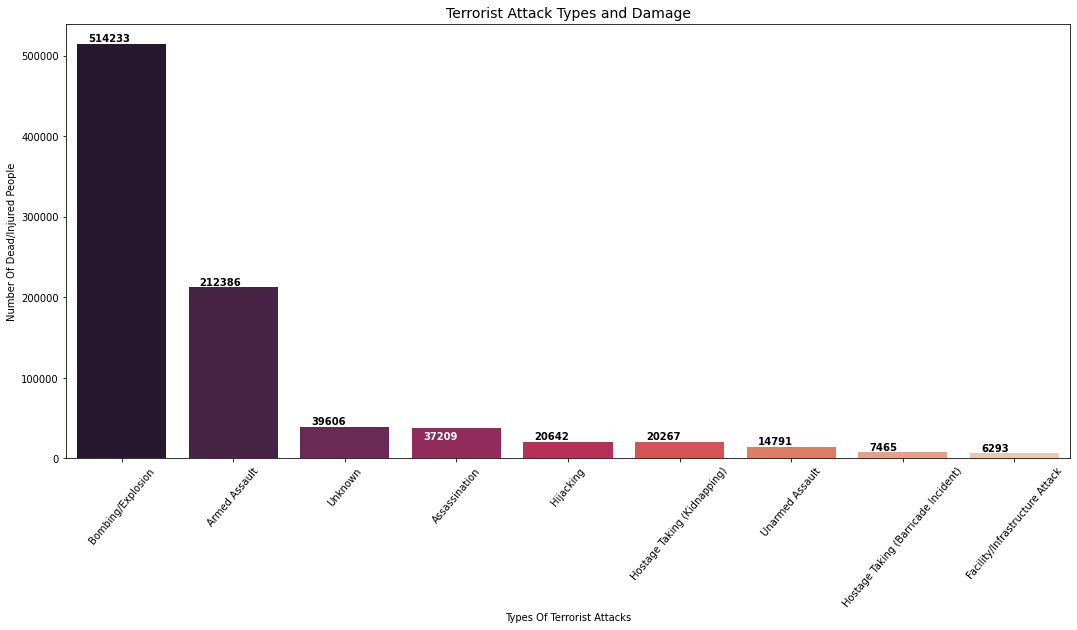

In [ ]:
labels = table_1['attacktype1_txt'].tolist()
dmg = table_1['Damage'].tolist()




plt.figure(figsize=(18, 8))

ax = sns.barplot(x=labels, y=dmg , palette="rocket")



for i,v in enumerate(dmg):
    ax.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), 
             color='w' if v==37209 else 'k',
             fontweight='bold')
ax.set(xlabel='Types Of Terrorist Attacks', ylabel='Number Of Dead/Injured People')

ax.set_xticklabels(ax.get_xticklabels(),rotation=50)
plt.title('Terrorist Attack Types and Damage', fontsize=14)


plt.show()

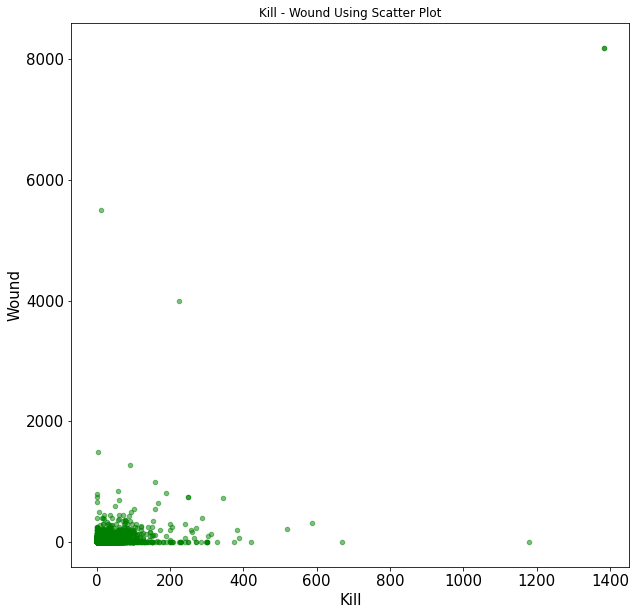

In [11]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'green', figsize = (10,10), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Using Scatter Plot')
plt.show()

In [15]:
Data = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(Data.dropna())))

Number of people killed by terror attack: 411868


In [23]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
typeKillData = pd.concat([attackData, killData], axis=1)
print(attackData)
print(typeKillData)


        attacktype1                 attacktype1_txt
0                 1                   Assassination
1                 6     Hostage Taking (Kidnapping)
2                 1                   Assassination
3                 3               Bombing/Explosion
4                 7  Facility/Infrastructure Attack
...             ...                             ...
181686            2                   Armed Assault
181687            3               Bombing/Explosion
181688            7  Facility/Infrastructure Attack
181689            3               Bombing/Explosion
181690            3               Bombing/Explosion

[181691 rows x 2 columns]
        attacktype1                 attacktype1_txt  nkill
0                 1                   Assassination    1.0
1                 6     Hostage Taking (Kidnapping)    0.0
2                 1                   Assassination    1.0
3                 3               Bombing/Explosion    NaN
4                 7  Facility/Infrastructure Attack   

In [20]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
print(typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


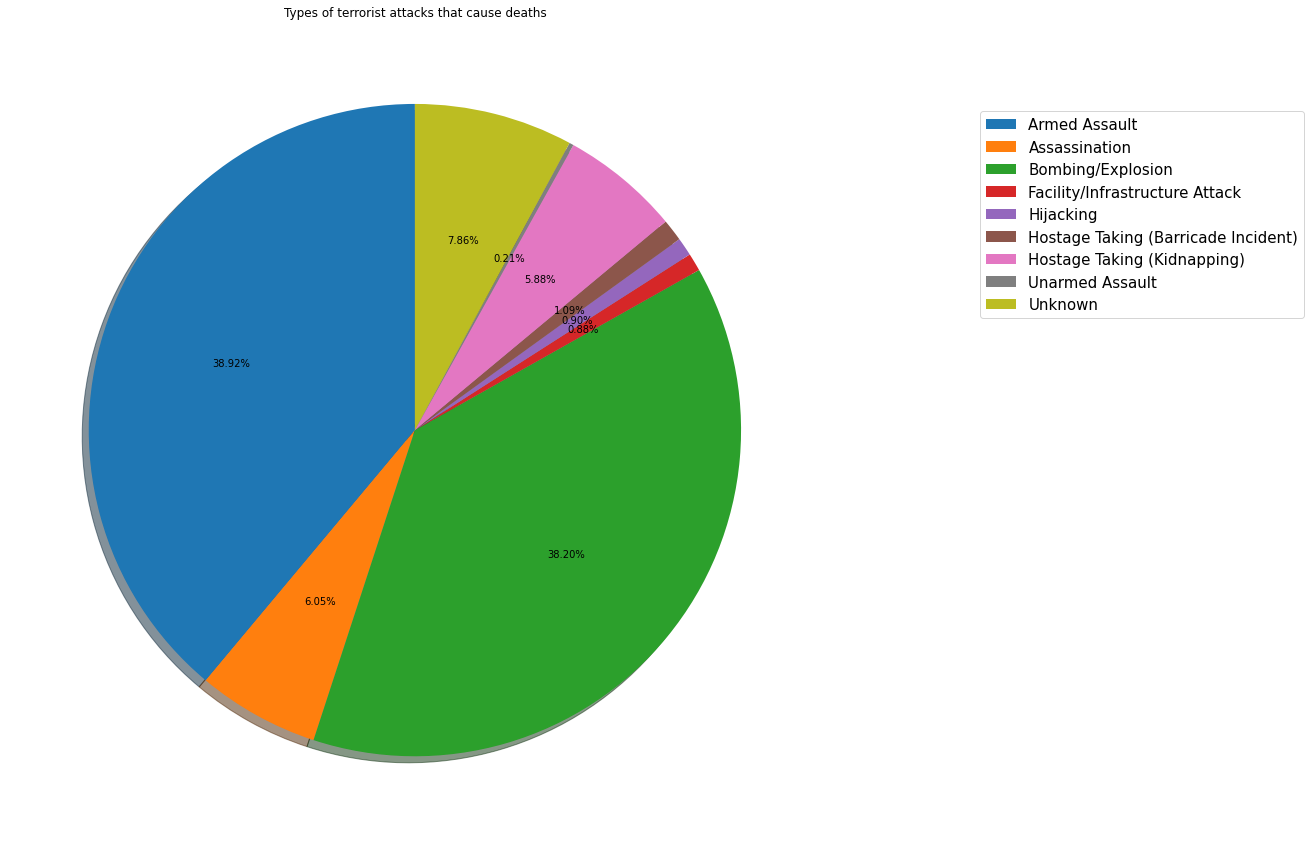

In [87]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%',shadow = True,
        colors = sns.color_palette())
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.6, 0.9), fontsize=15) # location legend
plt.show()